In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import requests
from sklearn import datasets
from sklearn.preprocessing import normalize
from tensorflow.python.framework import ops

In [7]:
# Create data
sess = tf.Session()
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100) 

In [10]:
# Create matricies to use in inverse method
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column,ones_column))
b = np.transpose(np.matrix(y_vals))

In [11]:
# Turn matricies into tensors
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [12]:
tA_A = tf.matmul(tf.transpose(A_tensor),A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv,tf.transpose(A_tensor))
solution = tf.matmul(product,b_tensor)
solution_eval = sess.run(solution)

In [15]:
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

slope: 0.9548465566731147
y_intercept: 0.12102723406186222


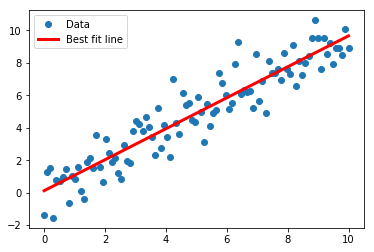

In [18]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.show()

In [2]:
ops.reset_default_graph()
sess = tf.Session()

In [23]:
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100) 
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column,ones_column))
b = np.transpose(np.matrix(y_vals))
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [24]:
# Find Cholesky decomposition of square matrix, A_T * A
tA_A = tf.matmul(tf.transpose(A_tensor),A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor),b)
sol1 = tf.matrix_solve(L,tA_b)
sol2 = tf.matrix_solve(tf.transpose(L),sol1)
solution_eval = sess.run(sol2)

In [27]:
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

slope: 0.9596727212062774
y_intercept: -0.01754938869029302


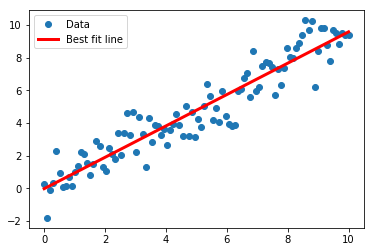

In [28]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.show()

In [43]:
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()

In [44]:
# Load our data
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])    

In [45]:
# Declare learning rate, batch size, placeholders, and variables
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [46]:
# Formula for linear model, y = Ax+b
model_output = tf.add(tf.multiply(x_data,A),b)

In [23]:
# Declare L2 loss function, which includes mean over the batch,
# Initialize variables, and declare optimizer
loss = tf.reduce_mean(tf.square(y_target-model_output))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [24]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #25 A = [[2.0755014]] b = [[2.8832545]]
Loss = 1.3533293
Step #50 A = [[1.6391134]] b = [[3.6424527]]
Loss = 0.3581132
Step #75 A = [[1.334647]] b = [[4.108904]]
Loss = 0.3310084
Step #100 A = [[1.1144646]] b = [[4.3729925]]
Loss = 0.33537397


In [25]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope*i + y_intercept)

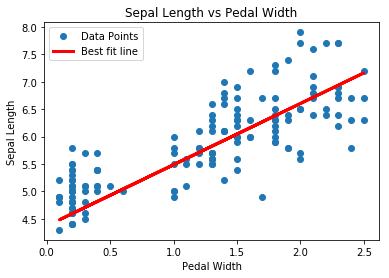

In [26]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

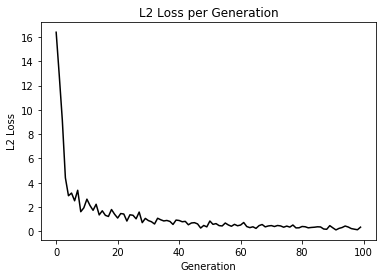

In [27]:
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

In [33]:
# Demonstrating how L2 and L1 loss functions affect convergence in linear regression
# Same as the previous graph, up until the loss function
# ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])  
learning_rate = 0.1
batch_size = 25
iterations = 100
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.multiply(x_data,A),b)

In [34]:
# Use L1 loss instead of L2 loss
# loss_l2 would be implemented with:
# loss_l2 = tf.reduce_mean(tf.square(y_target – model_output))
loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))

In [35]:
# Initialize variables, and declare optimizer
init = tf.global_variables_initializer()
sess.run(init)
my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l1 = my_opt_l1.minimize(loss_l1)

In [36]:
loss_vec_l1 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data: rand_x,y_target: rand_y})
    loss_vec_l1.append(temp_loss_l1)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))

Step #25 A = [[2.7602582]]b = [[1.6670668]]
Step #50 A = [[2.462258]]b = [[2.4630668]]
Step #75 A = [[2.0518577]]b = [[3.139067]]
Step #100 A = [[1.6330576]]b = [[3.7350678]]


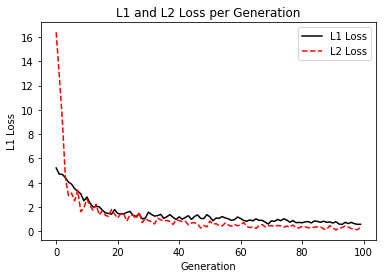

In [37]:
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec, 'r--', label='L2 Loss')
plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()

In [103]:
# If learning rate is small, convergence will take more time, but if too large, issues with algorithm never converging
# Large learning rate can overshoot L2 norm, where L1 norm converges
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 50
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)

In [104]:
# Linear regression minimizes vertical distance to line, Deming regression minimizes the total distance to the line
# To implement, we need to modify the loss function with a known geometric formula
demming_numerator = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))
demming_denominator = tf.sqrt(tf.add(tf.square(A),1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

In [105]:
# Initialize variables, and declare optimizer
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.1)
train_step = my_opt.minimize(loss)

In [106]:
loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%50==0:
        print('Step #''' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #50 A = [[3.987839]] b = [[-0.39048037]]
Loss = 0.48009393
Step #100 A = [[4.290741]] b = [[-0.07489084]]
Loss = 0.6537255
Step #150 A = [[4.3228817]] b = [[0.06432765]]
Loss = 0.51803195
Step #200 A = [[4.2734795]] b = [[0.1416346]]
Loss = 0.4827534
Step #250 A = [[4.2139354]] b = [[0.21867763]]
Loss = 0.5245945


Step #300 A = [[4.141712]] b = [[0.29410022]]
Loss = 0.4771246
Step #350 A = [[4.085622]] b = [[0.3867401]]
Loss = 0.4759603


Step #400 A = [[4.0288634]] b = [[0.48586714]]
Loss = 0.5354586
Step #450 A = [[3.9463413]] b = [[0.55704826]]
Loss = 0.43429822
Step #500 A = [[3.8776972]] b = [[0.64888275]]
Loss = 0.43322137


Step #550 A = [[3.813828]] b = [[0.7454345]]
Loss = 0.4647456
Step #600 A = [[3.73924]] b = [[0.8371984]]
Loss = 0.5439685
Step #650 A = [[3.6602845]] b = [[0.9348913]]
Loss = 0.50999403


Step #700 A = [[3.6047683]] b = [[1.064156]]
Loss = 0.4720312
Step #750 A = [[3.4729538]] b = [[1.1458948]]
Loss = 0.4140818
Step #800 A = [[3.3850863]] b = [[1.2629315]]
Loss = 0.39662373
Step #850 A = [[3.3321264]] b = [[1.4082127]]
Loss = 0.49684674
Step #900 A = [[3.2506845]] b = [[1.5402925]]
Loss = 0.46440923
Step #950 A = [[3.1419995]] b = [[1.6699963]]
Loss = 0.40464902


Step #1000 A = [[3.0417876]] b = [[1.8027575]]
Loss = 0.4941217


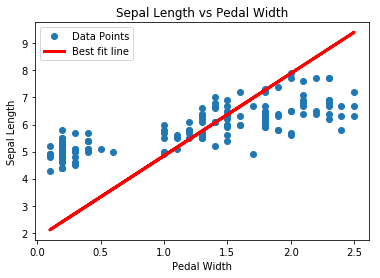

In [107]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

In [ ]:
# Lasso and Ridge Regression are very similar to linear regression, except adding regularization terms to limit slopes
# Restrict features that have impact on dependent variable by adding term to loss function that depends on the value of our slope

# For Lasso, add term that greatly increases loss function if slope A gets above a certain value
# Use continuous approximation to a step function, called continuous heavy step function
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.mul(-100.,tf.sub(A, lasso_param)))))
regularization_param = tf.mul(heavyside_step, 99.)
loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)),regularization_param)

# For Ridge, add term to L2 norm, which is scaled L2 norm of the slope coefficient
ridge_param = tf.constant(1.)
ridge_loss = tf.reduce_mean(tf.square(A))
loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), tf.mul(ridge_param, ridge_loss)), 0)

In [ ]:
# Elastic Net Regression combines lasso and ridge regression by adding L1 and L2 regularization term to loss function
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.mul(elastic_param1, l1_a_loss)
e2_term = tf.mul(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

In [6]:
ops.reset_default_graph()
sess = tf.Session()

In [13]:
# Website is forbidden, won't return results, completing as practice
birthdata_url = 'https://www.umass.edu/statdata/statdata/data/lowbwt.dat'
birth_file = requests.get(birthdata_url)
birth_data = birth_file.text.split('\r\n')[5:]
birth_data
birth_header = [x for x in birth_data[0].split('') if len(x) >= 1]
birth_data = [[float(x) for x in y.split( '') if len(x)>=1] for y in birth_data[1:] if len(y)>=1]
y_vals = np.array([x[1] for x in birth_data])
x_vals = np.array([x[2:9] for x in birth_data])

0


In [17]:
# Split dataset into train and test sets
train_indicies = np.random.choice(len(x_vals), round(len(x_vals)*0.8),replace=False)
test_indicies = np.array(list(set(range(len(x_vals))) - set(train_indicies)))
x_vals_train = x_vals[train_indicies]
x_vals_test = x_vals[test_indicies]
y_vals_train = y_vals[train_indicies]
y_vals_test = y_vals[test_indicies]

SyntaxError: invalid syntax (<ipython-input-17-fbfb07235841>, line 4)

In [18]:
# Logistic regression convergence works best when features are scaled between 0 and 1
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max-col_min)

In [ ]:
# Split into train and test before normalize, don't want training set to influence test set at all
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [19]:
# Declare batch size, placeholders, variables, and logistic model
# Sigmoid operation is built into our loss function
batch_size = 25
x_data = tf.placeholder(shape=[None, 7], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[7,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)

In [21]:
# Loss function has the sigmoid function, initialize variables, declare optimizer
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [ ]:
# Record loss function and classification accuracy on training and test set
# Returns accuracy for any batch size
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target),tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [ ]:
# Start training loop and record loss and accuracies
loss_vec = []
train_acc = []
test_acc = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(temp_acc_test)

In [ ]:
# Plot loss and accuracies
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()